In [2]:
import pandas as pd
data = pd.read_csv('test2019.csv', error_bad_lines=False, sep='|', header=None)

b'Skipping line 10: expected 5 fields, saw 7\nSkipping line 26: expected 5 fields, saw 8\nSkipping line 46: expected 5 fields, saw 6\nSkipping line 90: expected 5 fields, saw 6\nSkipping line 104: expected 5 fields, saw 6\nSkipping line 181: expected 5 fields, saw 8\nSkipping line 224: expected 5 fields, saw 6\nSkipping line 239: expected 5 fields, saw 6\nSkipping line 254: expected 5 fields, saw 6\nSkipping line 298: expected 5 fields, saw 6\nSkipping line 320: expected 5 fields, saw 7\nSkipping line 343: expected 5 fields, saw 6\nSkipping line 344: expected 5 fields, saw 6\nSkipping line 346: expected 5 fields, saw 6\nSkipping line 421: expected 5 fields, saw 7\nSkipping line 589: expected 5 fields, saw 6\nSkipping line 606: expected 5 fields, saw 8\nSkipping line 683: expected 5 fields, saw 6\nSkipping line 766: expected 5 fields, saw 8\nSkipping line 832: expected 5 fields, saw 6\nSkipping line 842: expected 5 fields, saw 6\nSkipping line 925: expected 5 fields, saw 7\nSkipping lin

In [3]:
data.head()

,0,1,2,3,4
0,2019-06-04,1135940529114492928,tradingview,#Bitcoin $BTC. A healthy correction or a reve...,
1,2019-06-04,1135939871300902912,TaylorPearsonMe,What's the best thing you've read on Bitcoin ...,
2,2019-06-04,1135939513174417408,Hatewatch,Traditional crowdfunding sites have kicked of...,"Montgomery, AL"
3,2019-06-04,1135939449592930304,joelcomm,Bitwise Calls Out to SEC: 95% of Bitcoin Trad...,Northern Colorado
4,2019-06-04,1135936904019546112,CalvinAyre,they are starting to understand how this stuf...,Antigua and Barbuda


In [4]:
data.shape

(27052, 5)

In [5]:
data = data.rename(columns={0: "date", 1: "id", 2: "name", 3: "text", 4: "location"})

In [8]:
data.Date = pd.to_datetime(data.Date, format='%Y%m%d', errors='ignore')

In [10]:
# Applyting datetime format
#data.Date = pd.to_datetime(data.Date)
data.set_index('date', inplace = True)

In [11]:
#Sorting idnex
data.sort_index(inplace = True)

In [12]:
data.head()

,id,name,text,location
date,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA"
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom


In [13]:
import missingno as msno

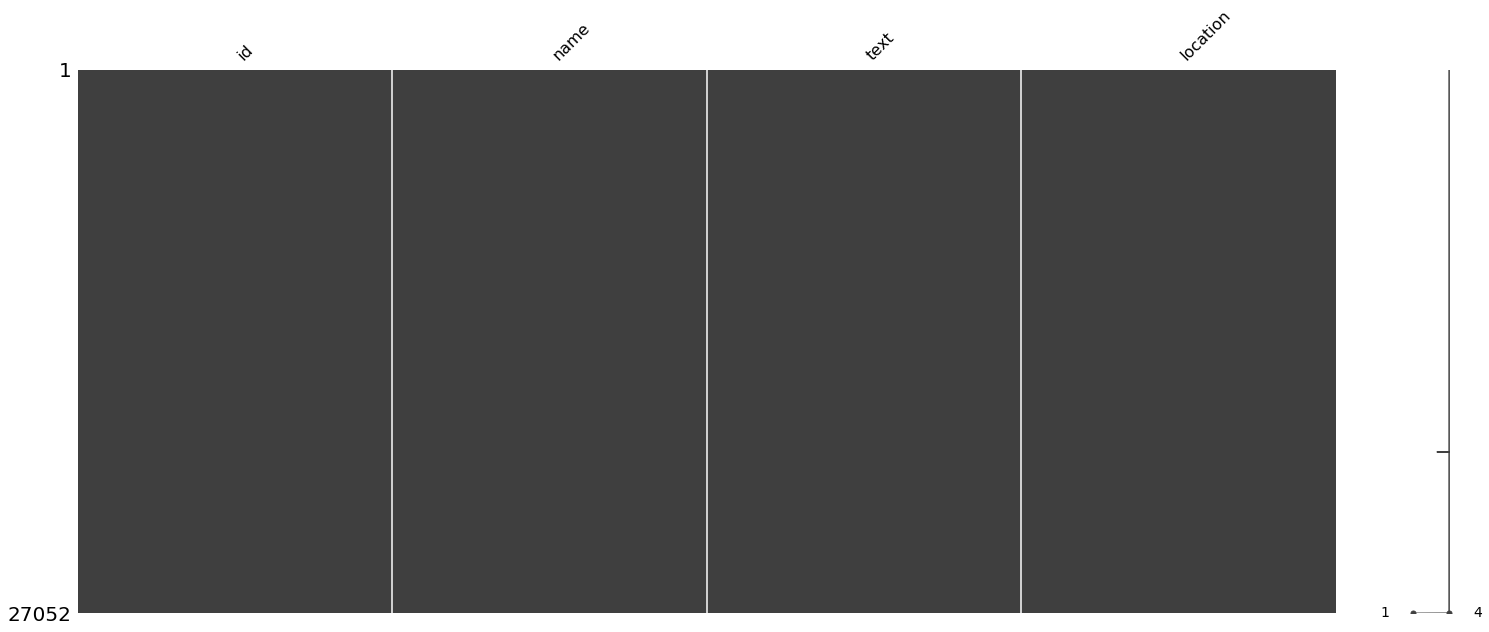

In [14]:
# Checking missing values
msno.matrix(data);

In [15]:
import numpy as np

In [16]:
data.isnull().sum()

id          0
name        1
text        1
location    2
dtype: int64

In [17]:
data.shape

(27052, 4)

In [18]:
# dropping NaN values
data.dropna(inplace=True)
data.isnull().sum()

id          0
name        0
text        0
location    0
dtype: int64

In [19]:
data.shape

(27050, 4)

In [21]:
# tweet mentions 
data['mention']=data['text'].str.startswith('@') #returns a boolean for all that match and adds new column

In [22]:
data.head() # notice new column 'mention'

,id,name,text,location,mention
date,,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False


In [25]:
data['text_clean'] = data.text

In [26]:
# cleaning the text
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [27]:
# removing twitter handles

In [28]:
data['text_clean'] = data['text_clean'].apply(str)

In [29]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [30]:
# # remove twitter handles (@user)
# data['mention_name'] = np.vectorize(remove_pattern)(data['text_clean'], "@[\w]*")

In [31]:
# remove twitter handles (@user)
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['text_clean'], "@[\w]*")

In [32]:
# remove special characters, numbers, punctuations
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
data['tidy_tweet'] = data['tidy_tweet'].str.replace("#", " ")
data.head()

,id,name,text,location,mention,text_clean,tidy_tweet
date,,,,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Part The First Major Hack ...
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,but it s not working I love you all Hap...
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn t it dawned on you yet that I don t writ...
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm I guess Bitcoin
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin is a lot like a religion that s kin...


In [33]:
# removig short words
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,id,name,text,location,mention,text_clean,tidy_tweet
date,,,,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Part First Major Hack https ne...
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn dawned that write about splinter groups w...
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm guess Bitcoin
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin like religion that kinda point post th...


In [35]:
# regex cleaning 

data['tidy_tweet'].replace('’s', '', inplace=True, regex=True)
data['tidy_tweet'].replace('’re', '', inplace=True, regex=True)
data['tidy_tweet'].replace('’t', '', inplace=True, regex=True)
data['tidy_tweet'].replace('’d', '', inplace=True, regex=True)
data['tidy_tweet'].replace('’m', '', inplace=True, regex=True)
data['tidy_tweet'].replace("'", '', inplace=True, regex=True)
data['tidy_tweet'].replace("$", '', inplace=True, regex=True)
data['tidy_tweet'].replace("rt", '', inplace=True, regex=True)
data['tidy_tweet'].replace("'ve", '', inplace=True, regex=True)
data['tidy_tweet'].replace("🤖", '', inplace=True, regex=True)
data['tidy_tweet'].replace("📊", '', inplace=True, regex=True)
data['tidy_tweet'].replace("📈", '', inplace=True, regex=True)
data['tidy_tweet'].replace("'\w*r\w*", '', inplace=True, regex=True)
data['tidy_tweet'].replace("/.+/", '', inplace=True, regex=True)
data['tidy_tweet'].replace("hmmm", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#ether", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#bch", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#xrp", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#bitcoincash", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#eos", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#stellar", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#litecoin", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#neo", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#ltc", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#bsv", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#ripple", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#blockchain", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#xlm", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#eth", '', inplace=True, regex=True)
data['tidy_tweet'].replace("#kitconews", '', inplace=True, regex=True)
data['tidy_tweet'].replace("tt", '', inplace=True, regex=True)
data['tidy_tweet'].replace("“", '', inplace=True, regex=True)
data['tidy_tweet'].replace("i've", '', inplace=True, regex=True)
data['tidy_tweet'].replace("i'll", '', inplace=True, regex=True)
data['tidy_tweet'].replace("i'll", '', inplace=True, regex=True)

In [37]:
data.head()

,id,name,text,location,mention,text_clean,tidy_tweet
date,,,,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn dawned that write about splinter groups w...
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm guess Bitcoin
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin like religion that kinda point post th...


In [38]:
# Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['tokenised'] = data['tidy_tweet'].apply(lambda x: tokenization(x.lower()))
data.head()

,id,name,text,location,mention,text_clean,tidy_tweet,tokenised
date,,,,,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"[bitcoin, history, pa, first, major, hack, hps..."
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"[working, love, happy, year, bitcoin, ethereum]"
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn dawned that write about splinter groups w...,"[hasn, dawned, that, write, about, splinter, g..."
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm guess Bitcoin,"[hmmm, guess, bitcoin]"
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin like religion that kinda point post th...,"[bitcoin, like, religion, that, kinda, point, ..."


In [39]:
# defining stop words
stopword = nltk.corpus.stopwords.words('english')

In [40]:
# removing stop words
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
data['Tweet_nonstop'] = data['tokenised'].apply(lambda x: remove_stopwords(x))
data.head()

,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop
date,,,,,,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"[bitcoin, history, pa, first, major, hack, hps...","[bitcoin, history, pa, first, major, hack, hps..."
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"[working, love, happy, year, bitcoin, ethereum]","[working, love, happy, year, bitcoin, ethereum]"
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn dawned that write about splinter groups w...,"[hasn, dawned, that, write, about, splinter, g...","[dawned, write, splinter, groups, write, bitco..."
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm guess Bitcoin,"[hmmm, guess, bitcoin]","[hmmm, guess, bitcoin]"
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin like religion that kinda point post th...,"[bitcoin, like, religion, that, kinda, point, ...","[bitcoin, like, religion, kinda, point, post, ..."


In [41]:
# Stemming and Lammitization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

data['Tweet_stemmed'] = data['Tweet_nonstop'].apply(lambda x: stemming(x))
data.head()

,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed
date,,,,,,,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"[bitcoin, history, pa, first, major, hack, hps...","[bitcoin, history, pa, first, major, hack, hps...","[bitcoin, histori, pa, first, major, hack, hp,..."
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"[working, love, happy, year, bitcoin, ethereum]","[working, love, happy, year, bitcoin, ethereum]","[work, love, happi, year, bitcoin, ethereum]"
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn dawned that write about splinter groups w...,"[hasn, dawned, that, write, about, splinter, g...","[dawned, write, splinter, groups, write, bitco...","[dawn, write, splinter, group, write, bitcoin,..."
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm guess Bitcoin,"[hmmm, guess, bitcoin]","[hmmm, guess, bitcoin]","[hmmm, guess, bitcoin]"
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin like religion that kinda point post th...,"[bitcoin, like, religion, that, kinda, point, ...","[bitcoin, like, religion, kinda, point, post, ...","[bitcoin, like, religion, kinda, point, post, ..."


In [42]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data['Tweet_lemmatized'] = data['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
data.head()

,id,name,text,location,mention,text_clean,tidy_tweet,tokenised,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
date,,,,,,,,,,,
2018-12-31,1079890357540843522,SocialMktgFella,Bitcoin History Part 7: The First Major Hack ...,"Orange County, CA",False,Bitcoin History Part 7: The First Major Hack ...,Bitcoin History Pa First Major Hack hps news b...,"[bitcoin, history, pa, first, major, hack, hps...","[bitcoin, history, pa, first, major, hack, hps...","[bitcoin, histori, pa, first, major, hack, hp,...","[bitcoin, history, pa, first, major, hack, hp,..."
2018-12-31,1079923403518177280,JohnLilic,... but it’s not working. I love you all. Hap...,Global Coverage,False,... but it’s not working. I love you all. Hap...,working love Happy year bitcoin ethereum,"[working, love, happy, year, bitcoin, ethereum]","[working, love, happy, year, bitcoin, ethereum]","[work, love, happi, year, bitcoin, ethereum]","[working, love, happy, year, bitcoin, ethereum]"
2018-12-31,1079923564130848769,Frances_Coppola,Hasn't it dawned on you yet that I don't writ...,United Kingdom,False,Hasn't it dawned on you yet that I don't writ...,Hasn dawned that write about splinter groups w...,"[hasn, dawned, that, write, about, splinter, g...","[dawned, write, splinter, groups, write, bitco...","[dawn, write, splinter, group, write, bitcoin,...","[dawned, write, splinter, group, write, bitcoi..."
2018-12-31,1079924140499333120,howardlindzon,Hmmm I guess Bitcoin.,Coronado,False,Hmmm I guess Bitcoin.,Hmmm guess Bitcoin,"[hmmm, guess, bitcoin]","[hmmm, guess, bitcoin]","[hmmm, guess, bitcoin]","[hmmm, guess, bitcoin]"
2018-12-31,1079926454840897537,Frances_Coppola,Bitcoin is a lot like a religion - that's kin...,United Kingdom,False,Bitcoin is a lot like a religion - that's kin...,Bitcoin like religion that kinda point post th...,"[bitcoin, like, religion, that, kinda, point, ...","[bitcoin, like, religion, kinda, point, post, ...","[bitcoin, like, religion, kinda, point, post, ...","[bitcoin, like, religion, kinda, point, post, ..."


In [43]:
data.to_csv('data_fully_cleaned.csv')